# Example 7.5: Destructive sample
Some quality control experiment require destructive sampling (i.e. the test to determine whether the item is defective destroys the item) in order to measure a particular characteristic of the product. The cost of destructive sampling often dictates small samples. 

Supose  a manufacturer of printers for personal computers wishes to estimate the mean number of characters printed before the printhead fails. The printer manufacturer test n=15 printheads and records the number of characters printed until failure of each. These 15 measurements (in millions of characters) are listed in PRINTHEAD.CSV. 

Form a 99% confidence interval for the mean number of characters printed before the printhead fails. Interpret the result.

What assumption is required for the interval you found in the question above to be valid ? Is that assumption reasonably satisfied ?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
#%matplotlib qt
#plt.close('all')
%matplotlib inline
df = pd.read_csv('PRINTHEAD.CSV')
print(df)


    NUMCHAR
0      1.13
1      1.55
2      1.43
3      0.92
4      1.25
5      1.36
6      1.32
7      0.85
8      1.07
9      1.48
10     1.20
11     1.33
12     1.18
13     1.22
14     1.29


Extract info from the sample

In [2]:
xb = df['NUMCHAR'].mean()
s = df['NUMCHAR'].std(ddof = 1)
n = len(df)
sm = s / np.sqrt(n)
print('sample mean: ',xb)
print('standard devitation sample (unbiased): ',s)
print('number of observations in the sample: ',n)
print('standard devitation sample mean (standard error of the mean): ',sm)


sample mean:  1.2386666666666666
standard devitation sample (unbiased):  0.19316412956959936
number of observations in the sample:  15
standard devitation sample mean (standard error of the mean):  0.04987476379384733


Look at the student - t distribution with df = n-1

[-3.78739024 -3.71087731 -3.63436438 -3.55785144 -3.48133851 -3.40482557
 -3.32831264 -3.2517997  -3.17528677 -3.09877384 -3.0222609  -2.94574797
 -2.86923503 -2.7927221  -2.71620916 -2.63969623 -2.5631833  -2.48667036
 -2.41015743 -2.33364449 -2.25713156 -2.18061863 -2.10410569 -2.02759276
 -1.95107982 -1.87456689 -1.79805395 -1.72154102 -1.64502809 -1.56851515
 -1.49200222 -1.41548928 -1.33897635 -1.26246341 -1.18595048 -1.10943755
 -1.03292461 -0.95641168 -0.87989874 -0.80338581 -0.72687288 -0.65035994
 -0.57384701 -0.49733407 -0.42082114 -0.3443082  -0.26779527 -0.19128234
 -0.1147694  -0.03825647  0.03825647  0.1147694   0.19128234  0.26779527
  0.3443082   0.42082114  0.49733407  0.57384701  0.65035994  0.72687288
  0.80338581  0.87989874  0.95641168  1.03292461  1.10943755  1.18595048
  1.26246341  1.33897635  1.41548928  1.49200222  1.56851515  1.64502809
  1.72154102  1.79805395  1.87456689  1.95107982  2.02759276  2.10410569
  2.18061863  2.25713156  2.33364449  2.41015743  2

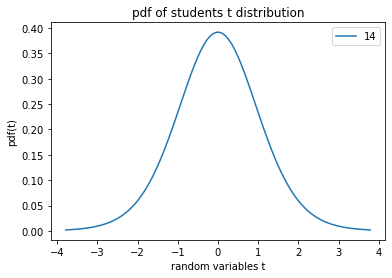

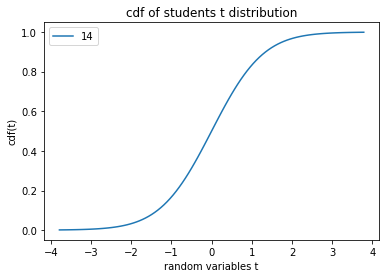

In [3]:
# freeze distribution
rv = sts.t(n-1)
t = np.linspace(rv.ppf(0.001),rv.ppf(0.999), 100)
print(t)
plt.figure()
plt.plot(t,rv.pdf(t), label = str(n-1))
plt.legend()
plt.title('pdf of students t distribution')
plt.xlabel('random variables t')
plt.ylabel('pdf(t)')
plt.show()

plt.figure()
plt.plot(t,rv.cdf(t), label = str(n-1))
plt.legend()
plt.title('cdf of students t distribution')
plt.xlabel('random variables t')
plt.ylabel('cdf(t)')
plt.show()

Find t1 such that  P(-t1<t<t1) = 0.99



In [4]:
t1 = rv.ppf(0.99+0.005)
print('t1: ',t1)
z1 = sts.norm.ppf(0.99+0.005)
print('z1: ',z1)

t1:  2.97684273411266
z1:  2.5758293035489004


99% confidence interval. 

In [5]:
print('99% confidence interval ', [xb - t1 * sm , xb + t1 * sm])
print('sampling error: ', t1 * sm)

99% confidence interval  [1.090197338451367, 1.3871359948819662]
sampling error:  0.1484693282152996


# checking normality: 
1. histogram 



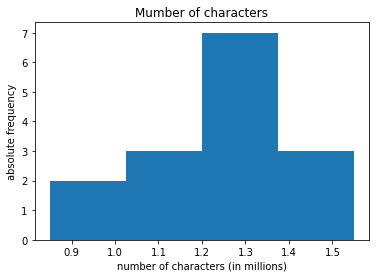

In [6]:
plt.figure()
plt.hist(df['NUMCHAR'],4)
plt.title('Mumber of characters')
plt.xlabel('number of characters (in millions)')
plt.ylabel('absolute frequency')
plt.show()

2. interval

In [7]:
print('mean : ', xb)
print('std : ',s)
print('sample size n : ',n)

df2 = (df['NUMCHAR']> xb-s) & (df['NUMCHAR'] < xb+s)

print(df2)
df2 = df2.value_counts()
print(df2)
print('fraction of elements 1s (68% expected): ',df2.loc[True]/n)

df2 = (df['NUMCHAR']> xb-2*s) & (df['NUMCHAR'] < xb+2*s)
df2 = df2.value_counts()
print('fraction of elements 2s (95% expected): ',df2.loc[True]/n)

df2 = (df['NUMCHAR']> xb-3*s) & (df['NUMCHAR'] < xb+3*s)
df2 = df2.value_counts()
print('fraction of elements 3s (100% expected): ',df2.loc[True]/n)

mean :  1.2386666666666666
std :  0.19316412956959936
sample size n :  15
0      True
1     False
2      True
3     False
4      True
5      True
6      True
7     False
8      True
9     False
10     True
11     True
12     True
13     True
14     True
Name: NUMCHAR, dtype: bool
True     11
False     4
Name: NUMCHAR, dtype: int64
fraction of elements 1s (68% expected):  0.7333333333333333
fraction of elements 2s (95% expected):  0.9333333333333333
fraction of elements 3s (100% expected):  1.0


3. IQR/s $\approx$ 1.3

In [8]:
qa = df['NUMCHAR'].quantile([0.25,0.75])
print(qa)

print('lower quartile : ',qa.loc[0.25])
print('upper quartile : ',qa.loc[0.75])
iqr = qa.loc[0.75] - qa.loc[0.25]

print('iqr/s = ',iqr/s)




0.25    1.155
0.75    1.345
Name: NUMCHAR, dtype: float64
lower quartile :  1.1549999999999998
upper quartile :  1.3450000000000002
iqr/s =  0.9836194764698334


4. Normal probability plot
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

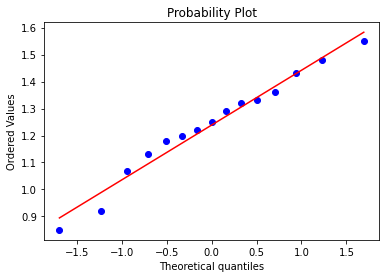

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = sts.probplot(df['NUMCHAR'],plot = ax)